# Programming Task 3  

**Assignment Points**: 100    
**Due Date**: Friday of Week 11 at 11:59pm   




---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task
You are employed by a large supermarket chain to perform customer segmentation analysis. In particular, you are provided with a dataset on 2000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures, and identify customer segments given the dataset. You will then collect your results in tables and diagrams which you will include in a report of **up to 1000 words** (not counting tables and figures). Make sure your report is informative, intuitive, and easy to understand by the management, who may not have technical expertise. 

Your report should include the following headings:

1. **Introduction** (10 marks)
    - Motivate the problem and what you are trying to accomplish in this report
2. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on summary statistics, etc.
3. **Customer Segmentation** (40 marks)
    - Apply clustering analysis we covered in lectures
    - Choose an optimal number of customer segments/clusters using methods discussed in lectures
    - Interpret identified clusters in terms customer profiles, e.g. there may be a cluster of university educated females living in a mid-sized city
    - Use two different clustering techniques
    - How do the clusters identified by the two techniques compare? (provide summary statistics for clusters and DON'T include all features)
4. **Recommendations** (20 marks)
    - Provide some suggestions regarding marketing techniques that may be developed for different clusters of customers 
5. **Conclusion** (10 marks)
    - A brief summary of what you have done in the report

<hr style="width:35%;margin-left:0;"> 

## Submission   
You will need to submit two files:   

1. One PDF document containing your report to be submitted to the management. The report should be self-contained and include all relevant tables/graphs that you generated using the submitted Jupyter notebook. I recommend writing the report in Word, and then saving it as a PDF file which will be submitted.
2. Your Jupyter Notebook containing Python code used in your analysis. Make sure your code is clean and easy to understand by the markers.  

---

## Exploratory Data Analysis

In [31]:
import pandas as pd

df = pd.read_csv('data/data.csv')
data = df.loc[:, 'Sex':'Settlement size']

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Customer data correlation matrix'}>

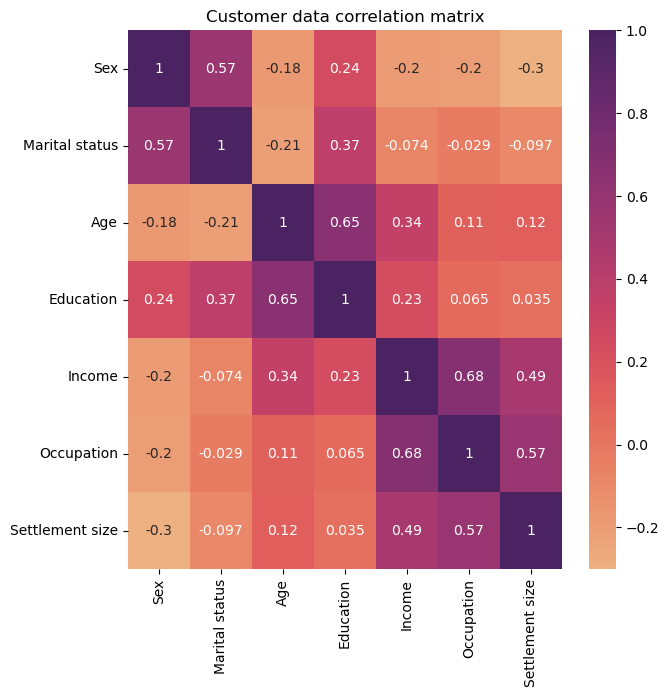

In [3]:
# Correlation matrix
dat_corr = data.corr()
plt.figure(figsize=(7,7))
plt.title("Customer data correlation matrix")
sns.heatmap(data=dat_corr, annot=True, cmap = 'flare')

In [4]:
data = data.replace({'Sex': {0: 'Male', 1: 'Female'}})
data = data.replace({'Marital status': {0: 'Single', 1: 'Non-single'}})
data = data.replace({'Education': {0: 'Other', 1: 'High school', 2: 'University', 3: 'Graduate school'}})
data = data.replace({'Occupation': {0: 'Unemployed', 1: 'Skilled employee/official', 2: 'Management'}})
data = data.replace({'Settlement size': {0: 'Small city', 1: 'Mid-sized city', 2: 'Big city'}})

Text(0.5, 1.0, 'Age distibution by Marital status')

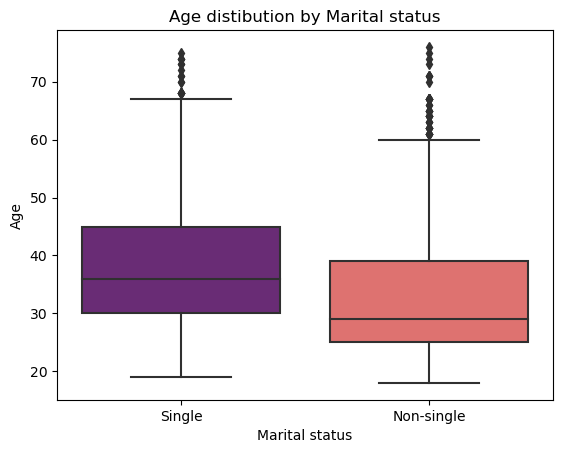

In [5]:
# Age
sns.boxplot(x=data['Marital status'], y=data['Age'], palette = 'magma')
plt.title('Age distibution by Marital status')

In [6]:
# Data for Income, Edu, Occupation
dat_scat = data.loc[:, ['Income','Education', 'Occupation']]

Text(0.5, 1.0, "Customers' Income vs. Education by Occupation")

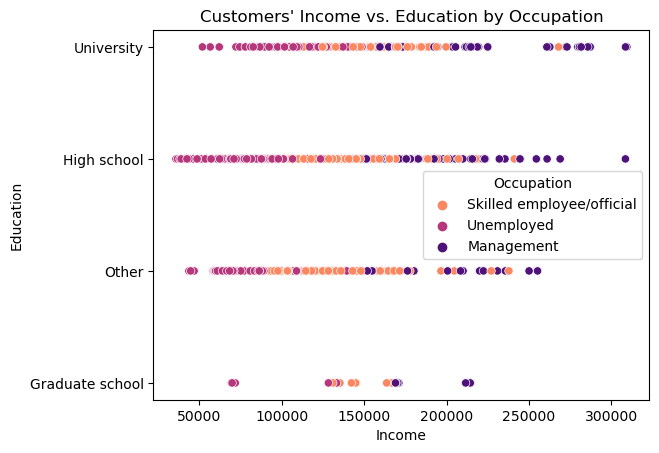

In [7]:
# Sex, edu, occupation visualisation
sns.scatterplot(x='Income', y='Education', hue='Occupation', data=dat_scat, palette = 'magma_r')
plt.title("Customers' Income vs. Education by Occupation")

In [8]:
# Settlement size
dat_bar = data.loc[:, ['Sex','Settlement size']]
db = {'Sex': ['Female', 'Male', 'Male', 'Male', 'Female', 'Female'], 
     'Settlement size': ['Small city', 'Small city', 'Big city', 'Mid-sized city', 'Mid-sized city', 'Big city'],
     'Count': dat_bar.value_counts().values}
dat_bar = pd.DataFrame(data=db)

Text(0.5, 1.0, 'Number of customers by Gender and Settlement size')

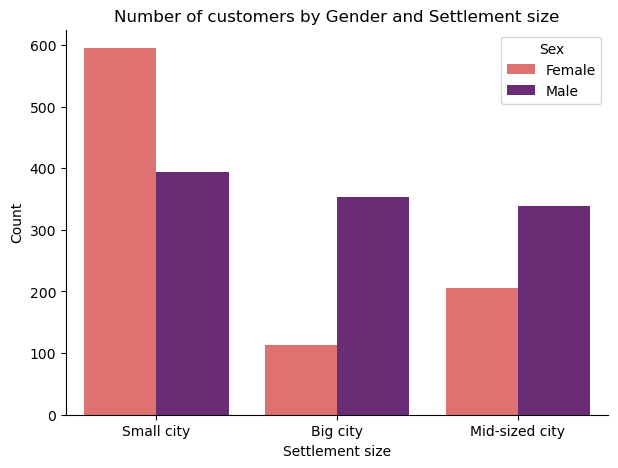

In [9]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.barplot(x='Settlement size', y='Count', data=dat_bar, palette='magma_r', hue='Sex')
plt.title('Number of customers by Gender and Settlement size')

<hr style="width:35%;margin-left:0;"> 

## Customer Segmentation
**Determine optimal k**

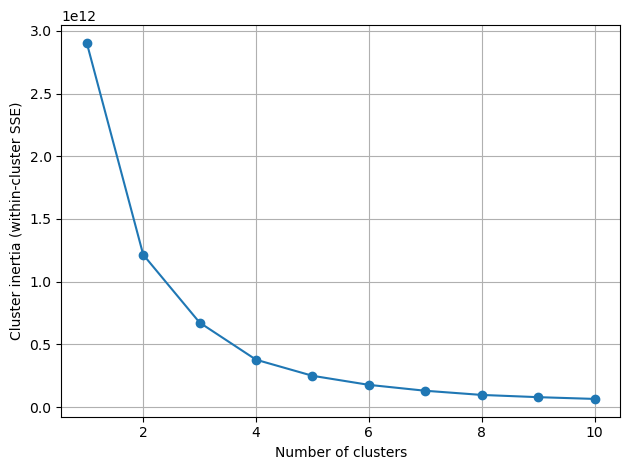

In [10]:
# Determine optimal k
from sklearn.cluster import KMeans
X = df.loc[:, 'Sex':'Settlement size'].values
inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
#plt.xticks(range(1,11))
plt.grid()
plt.tight_layout()
plt.show()

**k-means Clustering**

In [11]:
# k-means Clustering
km = KMeans(n_clusters=4, 
            init='random',  
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)

y_km = km.fit_predict(X)

#print(y_km)
#print(f'\nClusters:\n {km.cluster_centers_}')

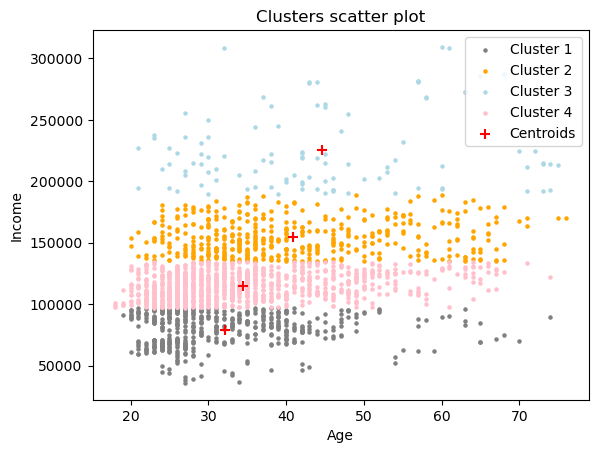

In [12]:
# Plot the clusters
plt.scatter(X[y_km == 0, 2], X[y_km == 0, 4], s=5, c='gray', label='Cluster 1')
plt.scatter(X[y_km == 1, 2], X[y_km == 1, 4], s=5, c='orange', label='Cluster 2')
plt.scatter(X[y_km == 2, 2], X[y_km == 2, 4], s=5, c='lightblue', label='Cluster 3')
plt.scatter(X[y_km == 3, 2], X[y_km == 3, 4], s=5, c='pink', label='Cluster 4')

plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 4], s=50, marker='+', c='red', label='Centroids')
plt.title('Clusters scatter plot')
plt.legend(scatterpoints=1)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [13]:
cus_clust = data
cus_clust['Cluster'] = y_km
cus_clust1 = cus_clust.loc[cus_clust['Cluster'] == 0]
cus_clust2 = cus_clust.loc[cus_clust['Cluster'] == 1]
cus_clust3 = cus_clust.loc[cus_clust['Cluster'] == 2]
cus_clust4 = cus_clust.loc[cus_clust['Cluster'] == 3]

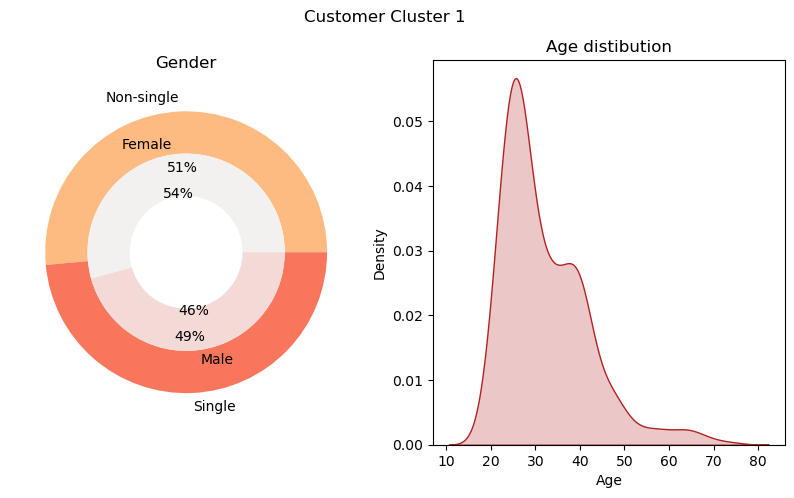

In [14]:
# Cluster 1
colors = sns.color_palette('magma_r')[0:5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Customer Cluster 1')

ax1.pie(cus_clust1['Marital status'].value_counts(), radius = 1, labels = ['Non-single', 'Single'], colors = colors, 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.pie(cus_clust1['Sex'].value_counts(), radius = 1-0.3, labels = ['Female', 'Male'], colors = sns.color_palette('light:salmon')[0:5], 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.set_title('Gender')

ax2 = sns.kdeplot(cus_clust1['Age'], fill = True, color = 'firebrick')
ax2.set_title('Age distibution')

plt.show()

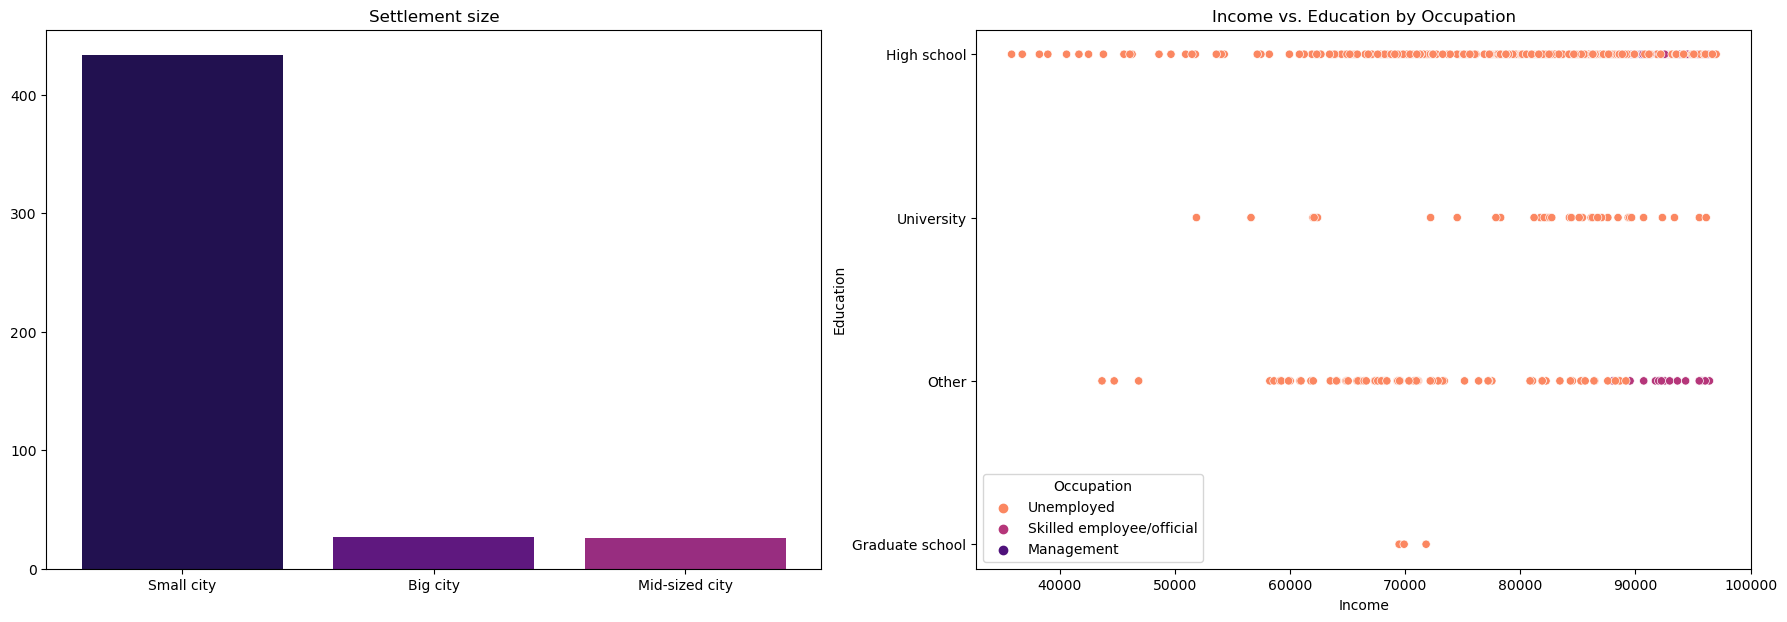

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.bar(['Small city', 'Big city', 'Mid-sized city'], cus_clust1['Settlement size'].value_counts(), color = sns.color_palette('magma')[0:5])
ax1.set_title('Settlement size')

ax2 = sns.scatterplot(x='Income', y='Education', hue='Occupation', data=cus_clust1, palette = 'magma_r')
ax2.set_title("Income vs. Education by Occupation")

plt.show()

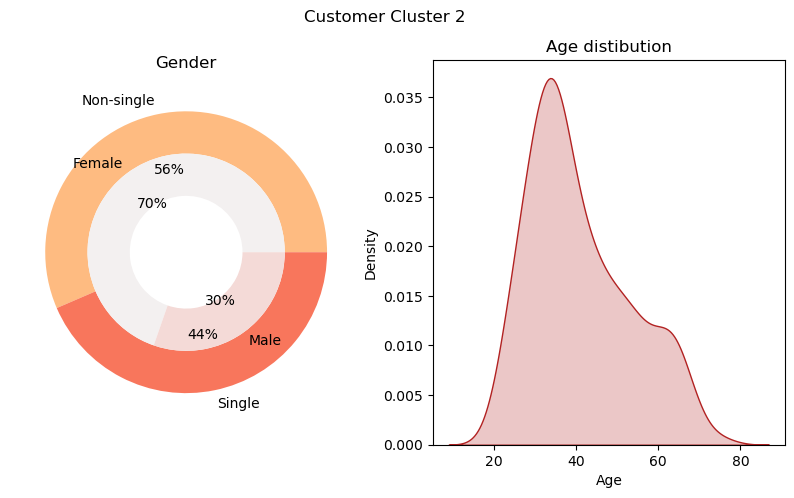

In [16]:
# Cluster 2
colors = sns.color_palette('magma_r')[0:5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Customer Cluster 2')

ax1.pie(cus_clust2['Marital status'].value_counts(), radius = 1, labels = ['Non-single', 'Single'], colors = colors, 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.pie(cus_clust2['Sex'].value_counts(), radius = 1-0.3, labels = ['Female', 'Male'], colors = sns.color_palette('light:salmon')[0:5], 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.set_title('Gender')

ax2 = sns.kdeplot(cus_clust2['Age'], fill = True, color = 'firebrick')
ax2.set_title('Age distibution')

plt.show()

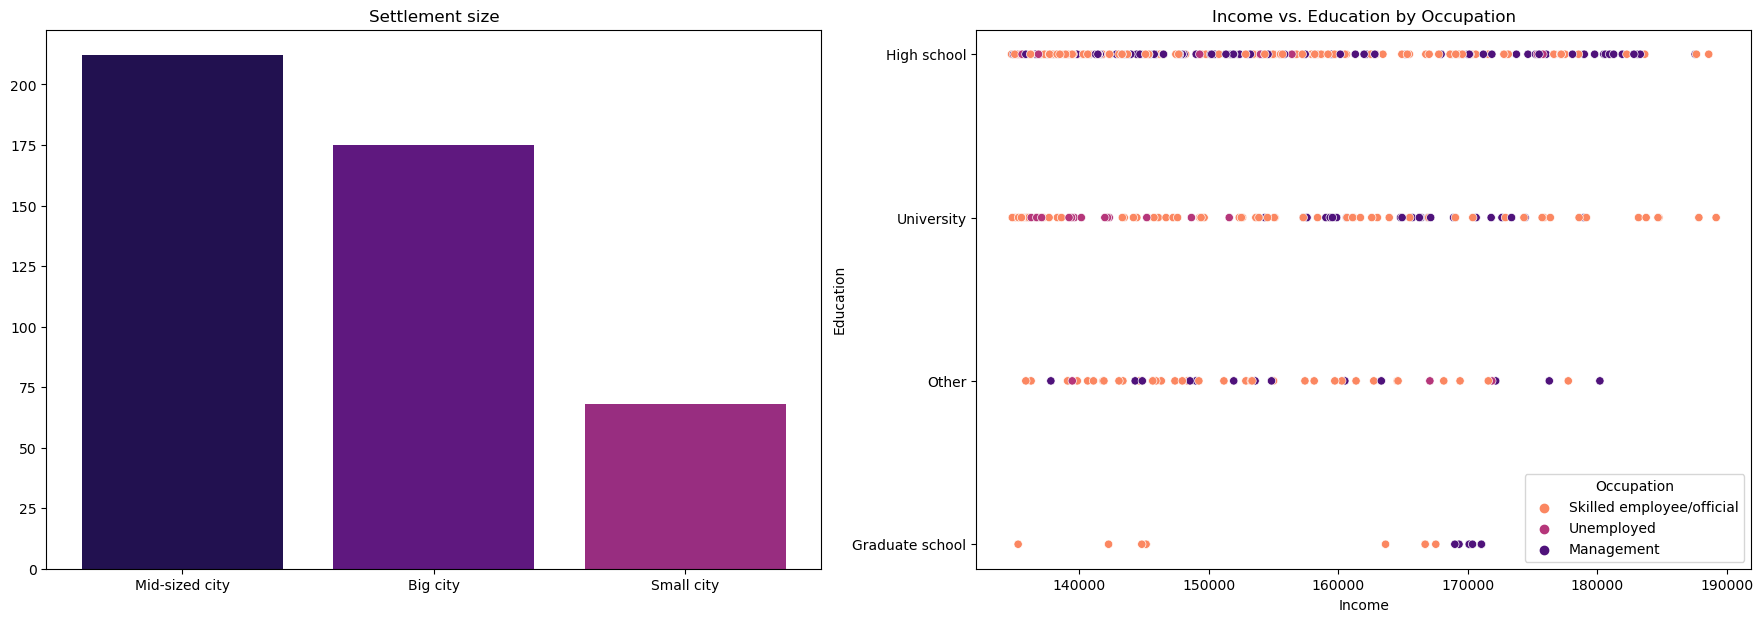

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.bar(['Mid-sized city', 'Big city', 'Small city'], cus_clust2['Settlement size'].value_counts(), color = sns.color_palette('magma')[0:5])
ax1.set_title('Settlement size')

ax2 = sns.scatterplot(x='Income', y='Education', hue='Occupation', data=cus_clust2, palette = 'magma_r')
ax2.set_title("Income vs. Education by Occupation")

plt.show()

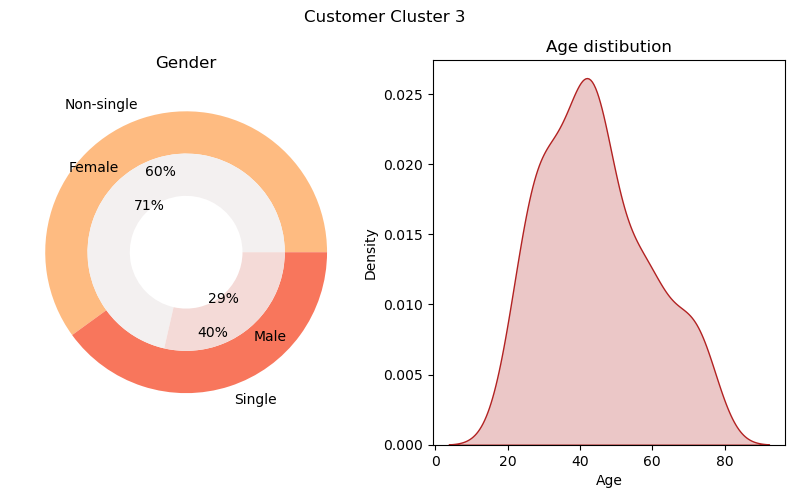

In [18]:
# Cluster 3
colors = sns.color_palette('magma_r')[0:5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Customer Cluster 3')

ax1.pie(cus_clust3['Marital status'].value_counts(), radius = 1, labels = ['Non-single', 'Single'], colors = colors, 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.pie(cus_clust3['Sex'].value_counts(), radius = 1-0.3, labels = ['Female', 'Male'], colors = sns.color_palette('light:salmon')[0:5], 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.set_title('Gender')

ax2 = sns.kdeplot(cus_clust3['Age'], fill = True, color = 'firebrick')
ax2.set_title('Age distibution')

plt.show()

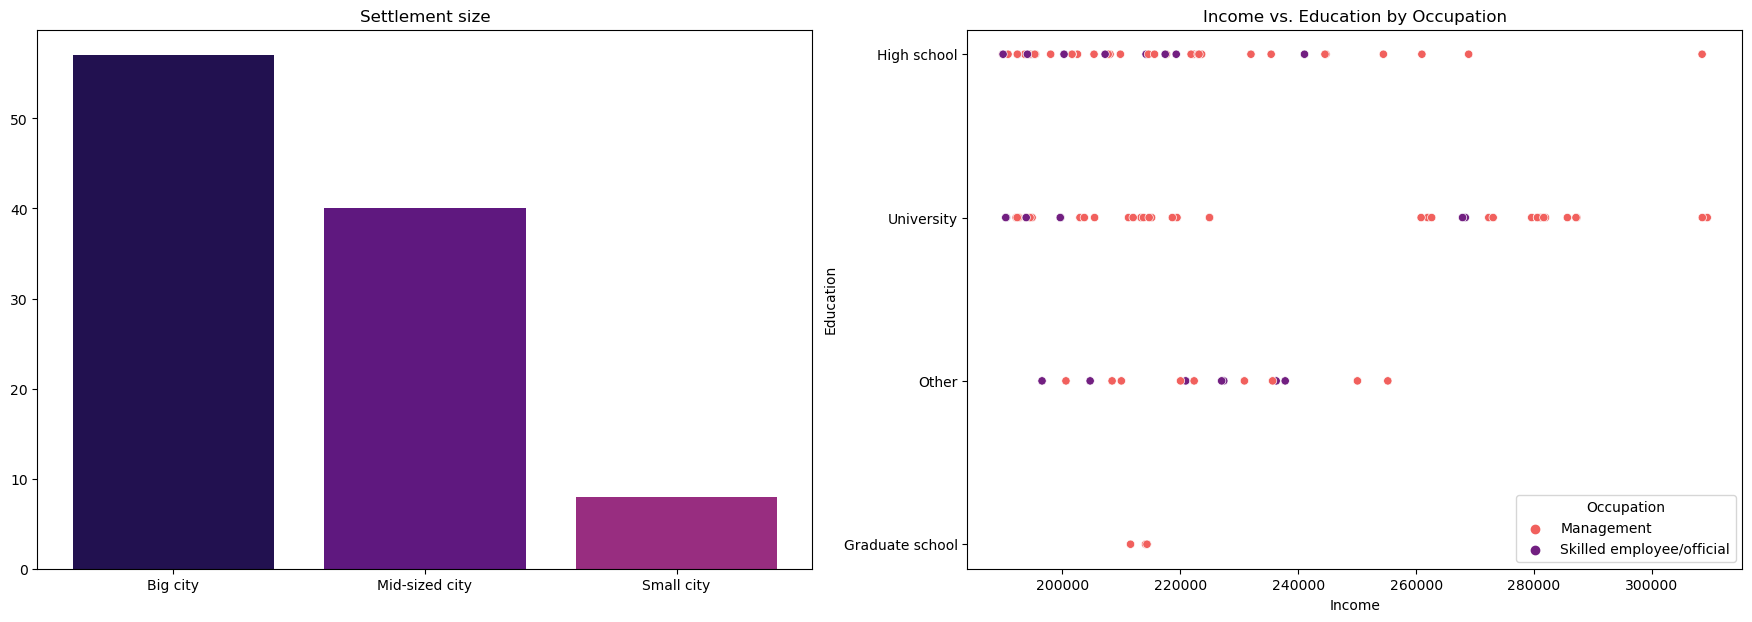

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.bar(['Big city', 'Mid-sized city', 'Small city'], cus_clust3['Settlement size'].value_counts(), color = sns.color_palette('magma')[0:5])
ax1.set_title('Settlement size')

ax2 = sns.scatterplot(x='Income', y='Education', hue='Occupation', data=cus_clust3, palette = 'magma_r')
ax2.set_title("Income vs. Education by Occupation")

plt.show()

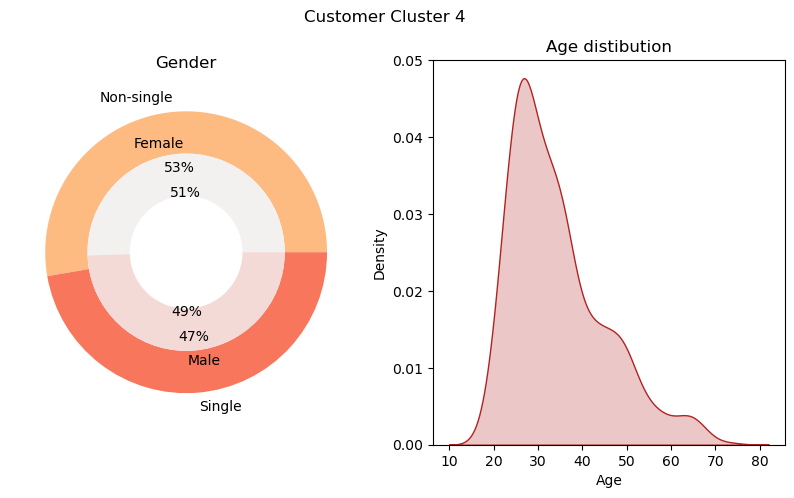

In [20]:
# Cluster 4
colors = sns.color_palette('magma_r')[0:5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Customer Cluster 4')

ax1.pie(cus_clust4['Marital status'].value_counts(), radius = 1, labels = ['Non-single', 'Single'], colors = colors, 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.pie(cus_clust4['Sex'].value_counts(), radius = 1-0.3, labels = ['Female', 'Male'], colors = sns.color_palette('light:salmon')[0:5], 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.set_title('Gender')

ax2 = sns.kdeplot(cus_clust4['Age'], fill = True, color = 'firebrick')
ax2.set_title('Age distibution')

plt.show()

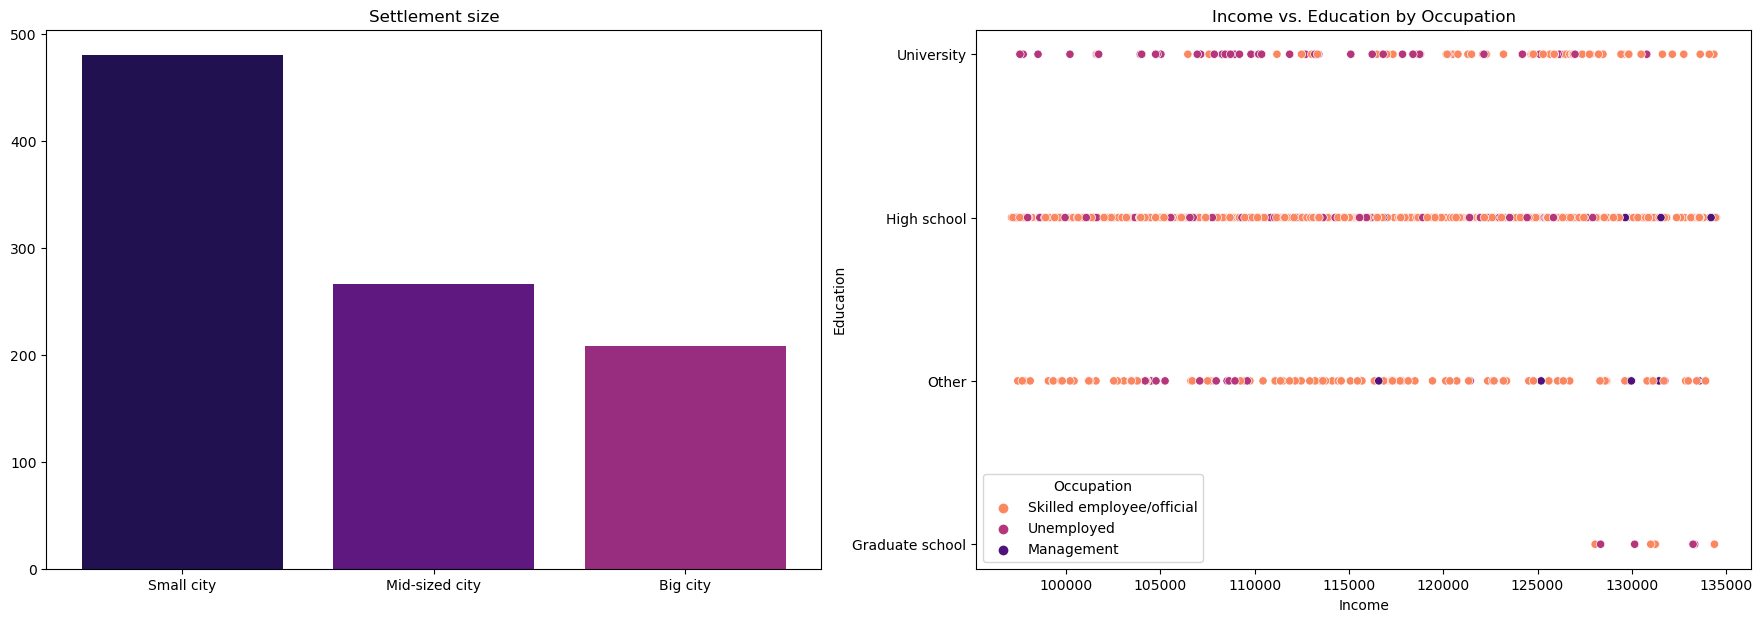

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.bar(['Small city', 'Mid-sized city', 'Big city'], cus_clust4['Settlement size'].value_counts(), color = sns.color_palette('magma')[0:5])
ax1.set_title('Settlement size')

ax2 = sns.scatterplot(x='Income', y='Education', hue='Occupation', data=cus_clust4, palette = 'magma_r')
ax2.set_title("Income vs. Education by Occupation")

plt.show()

**Hierarchical Clustering**

In [22]:
variables = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']
labels = df.iloc[:, 0].values

dat = pd.DataFrame(X, columns=variables, index=labels)

In [23]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(dat, metric='euclidean')),
                        columns=labels,
                        index=labels)

In [24]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(dat.values, method='ward', metric='euclidean')

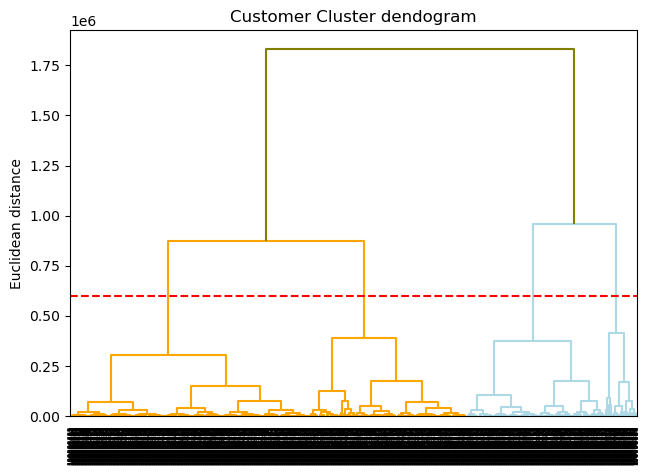

In [27]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['orange', 'lightblue', 'pink', 'gray'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels, above_threshold_color='olive')
plt.axhline(y=0.6*1e6, color='r', linestyle='--')
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.title('Customer Cluster dendogram')
plt.show()

In [28]:
ac = AgglomerativeClustering(n_clusters=4, 
                             metric='euclidean', 
                             linkage='ward')
y_ac = ac.fit_predict(X)
#print('Cluster labels: %s' % y_ac)

In [29]:
cus_hclust = data
cus_hclust['Cluster'] = y_ac
cus_hclust1 = cus_clust.loc[cus_clust['Cluster'] == 0]
cus_hclust2 = cus_clust.loc[cus_clust['Cluster'] == 1]
cus_hclust3 = cus_clust.loc[cus_clust['Cluster'] == 2]
cus_hclust4 = cus_clust.loc[cus_clust['Cluster'] == 3]
cus_hclust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 7 to 1237
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              110 non-null    object
 1   Marital status   110 non-null    object
 2   Age              110 non-null    int64 
 3   Education        110 non-null    object
 4   Income           110 non-null    int64 
 5   Occupation       110 non-null    object
 6   Settlement size  110 non-null    object
 7   Cluster          110 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 7.7+ KB


In [ ]:
# Cluster 1
colors = sns.color_palette('magma_r')[0:5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Customer Cluster 1')

ax1.pie(cus_hclust1['Marital status'].value_counts(), radius = 1, labels = ['Single', 'Non-single'], colors = colors, 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.pie(cus_hclust1['Sex'].value_counts(), radius = 1-0.3, labels = ['Male', 'Female'], colors = sns.color_palette('light:salmon')[0:5], 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.set_title('Gender')

ax2 = sns.kdeplot(cus_hclust1['Age'], fill = True, color = 'firebrick')
ax2.set_title('Age distibution')

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.bar(['Big city', 'Mid-sized city', 'Small city'], cus_hclust1['Settlement size'].value_counts(), color = sns.color_palette('magma')[0:5])
ax1.set_title('Settlement size')

ax2 = sns.scatterplot(x='Income', y='Education', hue='Occupation', data=cus_hclust1, palette = 'magma_r')
ax2.set_title("Income vs. Education by Occupation")

plt.show()

In [ ]:
# Cluster 2
colors = sns.color_palette('magma_r')[0:5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Customer Cluster 2')

ax1.pie(cus_hclust2['Marital status'].value_counts(), radius = 1, labels = ['Non-single', 'Single'], colors = colors, 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.pie(cus_hclust2['Sex'].value_counts(), radius = 1-0.3, labels = ['Female', 'Male'], colors = sns.color_palette('light:salmon')[0:5], 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.set_title('Gender')

ax2 = sns.kdeplot(cus_hclust2['Age'], fill = True, color = 'firebrick')
ax2.set_title('Age distibution')

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.bar(['Small city', 'Mid-sized city', 'Big city'], cus_hclust2['Settlement size'].value_counts(), color = sns.color_palette('magma')[0:5])
ax1.set_title('Settlement size')

ax2 = sns.scatterplot(x='Income', y='Education', hue='Occupation', data=cus_hclust2, palette = 'magma_r')
ax2.set_title("Income vs. Education by Occupation")

plt.show()

In [ ]:
# Cluster 3
colors = sns.color_palette('magma_r')[0:5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Customer Cluster 3')

ax1.pie(cus_hclust3['Marital status'].value_counts(), radius = 1, labels = ['Single', 'Non-single'], colors = colors, 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.pie(cus_hclust3['Sex'].value_counts(), radius = 1-0.3, labels = ['Male', 'Female'], colors = sns.color_palette('light:salmon')[0:5], 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.set_title('Gender')

ax2 = sns.kdeplot(cus_hclust3['Age'], fill = True, color = 'firebrick')
ax2.set_title('Age distibution')

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.bar(['Mid-sized city', 'Big city', 'Small city'], cus_hclust3['Settlement size'].value_counts(), color = sns.color_palette('magma')[0:5])
ax1.set_title('Settlement size')

ax2 = sns.scatterplot(x='Income', y='Education', hue='Occupation', data=cus_hclust3, palette = 'magma_r')
ax2.set_title("Income vs. Education by Occupation")

plt.show()

In [ ]:
# Cluster 4
colors = sns.color_palette('magma_r')[0:5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Customer Cluster 4')

ax1.pie(cus_hclust4['Marital status'].value_counts(), radius = 1, labels = ['Non-single', 'Single'], colors = colors, 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.pie(cus_hclust4['Sex'].value_counts(), radius = 1-0.3, labels = ['Male', 'Female'], colors = sns.color_palette('light:salmon')[0:5], 
        autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax1.set_title('Gender')

ax2 = sns.kdeplot(cus_hclust4['Age'], fill = True, color = 'firebrick')
ax2.set_title('Age distibution')

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.bar(['Small city', 'Mid-sized city', 'Big city'], cus_hclust4['Settlement size'].value_counts(), color = sns.color_palette('magma')[0:5])
ax1.set_title('Settlement size')

ax2 = sns.scatterplot(x='Income', y='Education', hue='Occupation', data=cus_hclust4, palette = 'magma_r')
ax2.set_title("Income vs. Education by Occupation")

plt.show()